In [ ]:
import duckdb as db

store = db.connect("/tmp/provision.db")

for sql in [
    "CREATE SEQUENCE if not exists id_provision START 1;",
    "create table if not exists provision (id INT default nextval('id_provision'), created date default current_date(), name varchar, course varchar, contact varchar, expired date, memo varchar)"
]:
    store.execute(sql)



In [ ]:
store.execute("insert into provision (name, password, course, contact, expired, memo) values (?, ?, ?, ?, ?, ?)", ["aaron", "24lecture", "wx", None, None])

In [ ]:
store.execute("from provision").fetch_df()

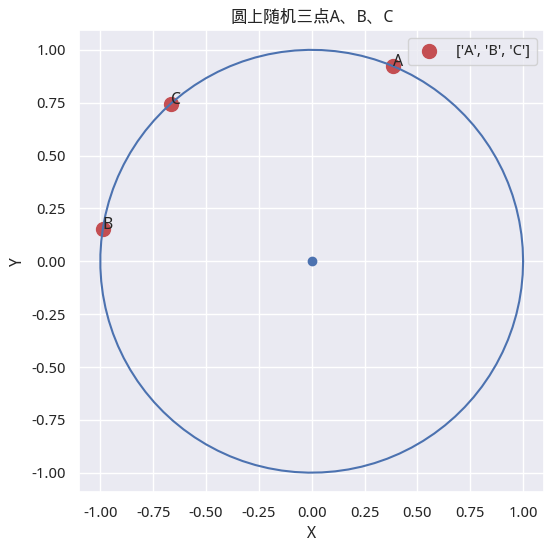

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 生成圆的参数
radius = 1  # 圆的半径
theta = np.linspace(0, 2 * np.pi, 100)  # 角度从0到2π
x = radius * np.cos(theta)
y = radius * np.sin(theta)

# 随机生成三点的角度（0到π之间）
np.random.seed(42)
angles = np.random.uniform(0, np.pi, 3)
points_x = radius * np.cos(angles)
points_y = radius * np.sin(angles)

# 绘图
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'b-')  # 绘制圆
plt.plot(0,0, "o")
plt.scatter(points_x, points_y, c='r', s=100, label=['A', 'B', 'C'])  # 绘制三点
plt.text(points_x[0], points_y[0], 'A', fontsize=12)
plt.text(points_x[1], points_y[1], 'B', fontsize=12)
plt.text(points_x[2], points_y[2], 'C', fontsize=12)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('圆上随机三点A、B、C')
plt.legend()
plt.grid(True)
plt.show()

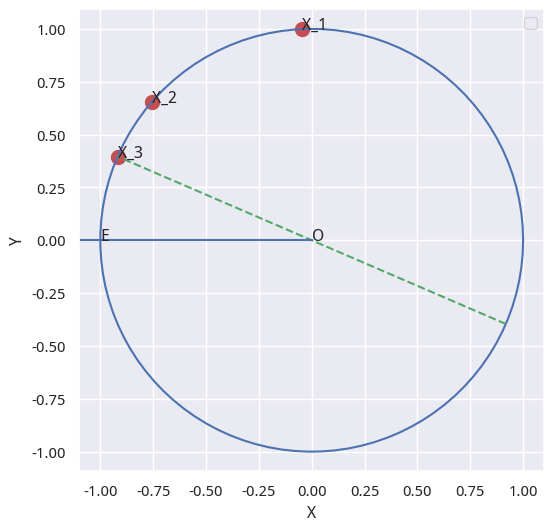

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成圆的参数
radius = 1  # 圆的半径
theta = np.linspace(0, 2 * np.pi, 100)  # 角度从0到2π
x = radius * np.cos(theta)
y = radius * np.sin(theta)

# 随机生成三点的角度（0到π之间）
np.random.seed(14)
angles = np.random.uniform(0, np.pi, 3)
points_x = radius * np.cos(angles)
points_y = radius * np.sin(angles)

# 计算点C关于圆心的对称点（延长线与圆的另一个交点）
# 点C是第三个点（索引2）
c_x, c_y = points_x[2], points_y[2]
# 对称点坐标（方向相反，距离圆心等距）
symmetric_x = -c_x
symmetric_y = -c_y

# 绘图
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'b-')  # 绘制圆
# plt.plot(0, 0, "o", color='black', label='圆心')  # 圆心

# 绘制点C与圆心的连接线，并延长到对称点（虚线）
plt.plot([symmetric_x, c_x], [symmetric_y, c_y], 'g--')
plt.axhline(xmax=0.5)

# 绘制三点
plt.scatter(points_x, points_y, c='r', s=100)
plt.text(points_x[0], points_y[0], 'X_1', fontsize=12)
plt.text(points_x[1], points_y[1], 'X_2', fontsize=12)
plt.text(points_x[2], points_y[2], 'X_3', fontsize=12)
plt.text(0, 0, 'O')
plt.text(-1,0, 'E')

plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('圆上随机三点A、B、C及C的延长线')
plt.legend()
plt.grid(True)
plt.show()


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not f

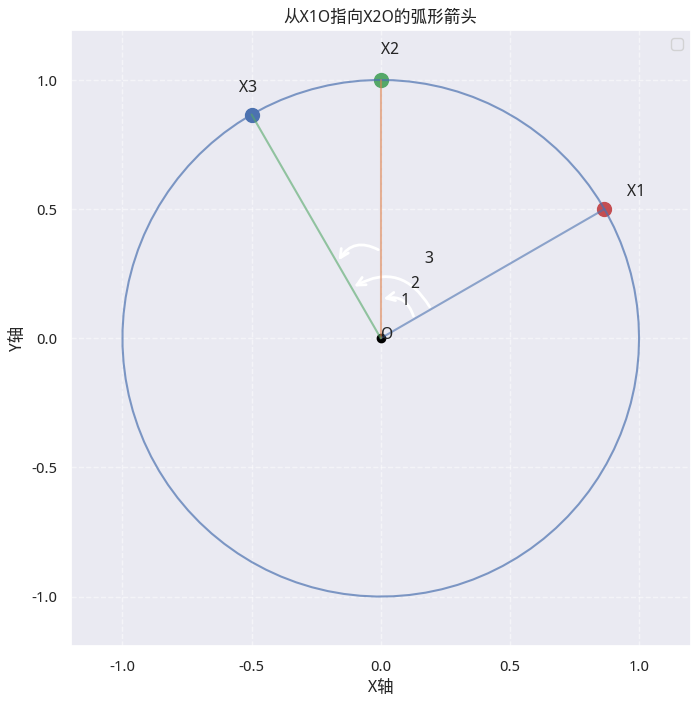

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, FancyArrowPatch
import math

# 设置中文字体
# plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]

# 圆参数
radius = 1
theta_circle = np.linspace(0, 2 * np.pi, 100)
x_circle = radius * np.cos(theta_circle)
y_circle = radius * np.sin(theta_circle)

# 三个点的角度（固定角度便于演示箭头效果）
angles = np.array([np.pi/6, np.pi/2, 2*np.pi/3])  # 30°, 90°, 120°
angles = np.sort(angles)

# 计算点坐标
points_x = radius * np.cos(angles)
points_y = radius * np.sin(angles)

# 绘图
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_circle, y_circle, 'b-', alpha=0.7)  # 绘制圆

# 圆心
ax.plot(0, 0, "o", color='black', markersize=6)
ax.text(0, 0, "O")

# 绘制点和连线
colors = ['r', 'g', 'b']
for i in range(3):
    # 连线
    ax.plot([0, points_x[i]], [0, points_y[i]], alpha=0.6)
    # 点
    ax.scatter(points_x[i], points_y[i], c=colors[i], s=100)
    # 标注
    ax.text(points_x[i] * 1.1, points_y[i] * 1.1, 
            f'X{i+1}', fontsize=12)

# 绘制X1O到X2O的弧形箭头
theta1, theta2, theta3 = angles[0], angles[1], angles[2]  # X1和X2的角度
mid_theta = (theta1 + theta2) / 2  # 箭头中点角度
arrow_radius = 0.3  # 箭头半径（小于圆半径）

# 计算弧形箭头的起点和终点

i = 1
size = 0.5
for thetas, thetae in ((theta1, theta2), (theta1, theta3), (theta2, theta3)):
    start_x = arrow_radius * np.cos(thetas) * size 
    start_y = arrow_radius * np.sin(thetas) * size
    end_x = arrow_radius * np.cos(thetae) * size
    end_y = arrow_radius * np.sin(thetae) * size

    # 创建弧形箭头
    arrow = FancyArrowPatch(
        (start_x, start_y), (end_x, end_y),
        connectionstyle=f"arc3,rad={0.5 if theta2-theta1 < np.pi else -0.5}",  # 弧度方向
        arrowstyle="->", linewidth=2, mutation_scale=15
    )
    ax.add_patch(arrow)

    # 标注箭头含义
    ax.text(arrow_radius * np.cos(mid_theta) * size, 
            arrow_radius * np.sin(mid_theta) * size,
            f'{i}', fontsize=12)
    
    i += 1
    size *= 1.5

# 坐标轴设置{i}
ax.axis('equal')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_title('从X1O指向X2O的弧形箭头')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.show()
    

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not f

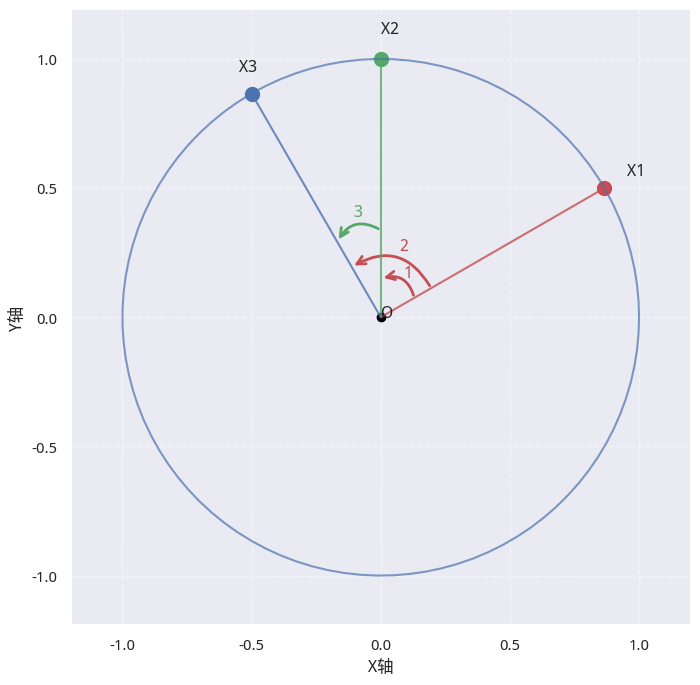

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import math

# 圆参数
radius = 1
theta_circle = np.linspace(0, 2 * np.pi, 100)
x_circle = radius * np.cos(theta_circle)
y_circle = radius * np.sin(theta_circle)

# 三个点的角度（固定角度便于演示箭头效果）
angles = np.array([np.pi/6, np.pi/2, 2*np.pi/3])  # 30°, 90°, 120°
angles = np.sort(angles)

# 计算点坐标
points_x = radius * np.cos(angles)
points_y = radius * np.sin(angles)

# 定义每个点的颜色（将用于连线和对应弧线）
colors = ['r', 'g', 'b']  # X1:红色, X2:绿色, X3:蓝色

# 绘图
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_circle, y_circle, 'b-', alpha=0.7)  # 绘制圆

# 圆心
ax.plot(0, 0, "o", color='black', markersize=6)
ax.text(0, 0, "O")

# 绘制点和连线（使用指定颜色）
for i in range(3):
    # 连线 - 使用对应点的颜色
    ax.plot([0, points_x[i]], [0, points_y[i]], color=colors[i], alpha=0.8)
    # 点
    ax.scatter(points_x[i], points_y[i], c=colors[i], s=100)
    # 标注
    ax.text(points_x[i] * 1.1, points_y[i] * 1.1, 
            f'X{i+1}', fontsize=12)

# 定义要绘制的弧线组合（起点角度, 终点角度, 起点索引）
arc_combinations = [
    (angles[0], angles[1], 0),  # X1到X2的弧线，使用X1的颜色（红色）
    (angles[0], angles[2], 0),  # X1到X3的弧线，使用X1的颜色（红色）
    (angles[1], angles[2], 1)   # X2到X3的弧线，使用X2的颜色（绿色）
]

arrow_radius = 0.3  # 基础箭头半径
size = 0.5          # 基础大小缩放因子

for i, (thetas, thetae, color_idx) in enumerate(arc_combinations):
    # 计算弧形箭头的起点和终点
    start_x = arrow_radius * np.cos(thetas) * size 
    start_y = arrow_radius * np.sin(thetas) * size
    end_x = arrow_radius * np.cos(thetae) * size
    end_y = arrow_radius * np.sin(thetae) * size

    # 确定弧线方向（取短弧）
    arc_radius = 0.5 if (thetae - thetas) < np.pi else -0.5
    
    # 创建弧形箭头 - 使用对应起点的颜色
    arrow = FancyArrowPatch(
        (start_x, start_y), (end_x, end_y),
        connectionstyle=f"arc3,rad={arc_radius}",
        arrowstyle="->", 
        color=colors[color_idx],  # 与起点连线同色
        linewidth=2, 
        mutation_scale=15
    )
    ax.add_patch(arrow)

    # 计算箭头中点角度用于标注
    mid_theta = (thetas + thetae) / 2
    # 标注箭头序号
    ax.text(
        arrow_radius * np.cos(mid_theta) * size * 1.2, 
        arrow_radius * np.sin(mid_theta) * size * 1.2,
        f'{i+1}', 
        fontsize=12,
        color=colors[color_idx]  # 标注也使用相同颜色
    )
    
    # 增大下一个箭头的尺寸
    size *= 1.5

# 坐标轴设置
ax.axis('equal')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
# ax.set_title('弧线与起点连线同色的演示')
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()
    